In [4]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='/global/homes/j/jharno/IA-infusion/SkySim5000/tools/SkySim5000_IA_infusion/correlations/'
path_nicaea='/global/homes/j/jharno/IA-infusion/SkySim5000/tools/SkySim5000_IA_infusion/predictions_nicaea/'

Populating the interactive namespace from numpy and matplotlib


Working on bins 1 1


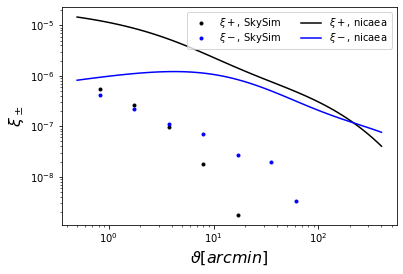

Working on bins 2 2


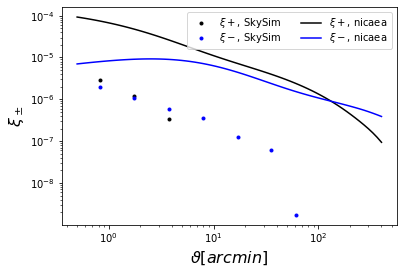

Working on bins 3 3


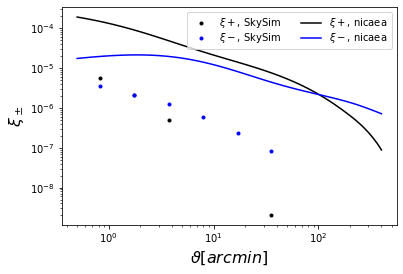

Working on bins 4 4


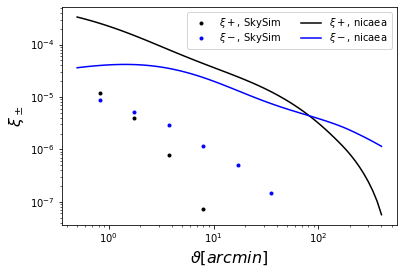

Working on bins 5 5


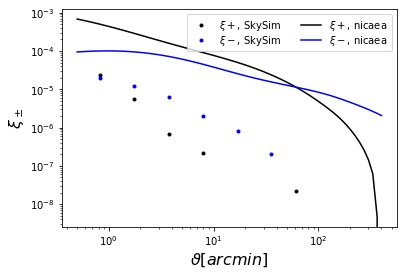

In [9]:
# Load the Treecorr measurements:
counter=0
xip=np.empty([9,15])
xim=np.empty([9,15])

for bin1 in range(1,6):
    for bin2 in range (bin1,bin1+1):
    #for bin2 in range (bin1,6):

        
        print('Working on bins', bin1, bin2)
        
        # Get Treecorr measurements
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin2,bin1)
        #print('Opening ',filename)
        gg = treecorr.GGCorrelation(nbins = 9, min_sep = 0.00833333, max_sep = 7.925, bin_slop = 0.01) 
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim
        theta=gg.meanr*60.0
        
        
        #Get xi+ theory
        file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        theta_nicaea=file_nicaea[:,0]
        xip_nicaea=file_nicaea[:,2]

        #Get Xi- theory
        file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        xim_nicaea=file_nicaea[:,2]

        counter +=1
        
        plt.plot(theta, gg.xip, 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta, gg.xim, 'b.', label='$\\xi-$, SkySim')
        plt.plot(theta_nicaea, xip_nicaea, 'k-', label='$\\xi+$, nicaea')
        plt.plot(theta_nicaea, xim_nicaea, 'b-', label='$\\xi-$, nicaea')

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_\\pm$', fontsize=16)
        plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
        plt.show()

In [28]:
counter

15